### House Price Prediction - Ridge & Lasso Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test (2).csv")

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

`MSSubClass`: type of house involved in the sale.
`MSZoning`: zoning classification like industry, residential, etc.
`LotFrontage`: Linear feet of street connected to property
`LotArea`: Lot size in square feet
`Street`: gravel or paved street
`Alley`: gravel or paved street or no alley ta all
`LotShape`: regular, slightly/moderately irregular or irregular
`LandContour`: Flatness of the property
`Utilities`: Type of utilities available like water, electricity
`LotConfig`: Lot configuration
`LandSlope`: Slope of property
`Neighborhood`: Physical locations within Ames city limits
`BldgType`: type of house, single, double, duplex
`HouseStyle`: house style, split-level,fully-finished, etc
`OverallQual`: Rates the overall material and finish of the house
`OverallCond`: Rates the overall condition of the house
`YearBuilt`: Original construction date
`YearRemodAdd`: Remodel date
`RoofStyle`: Type of roof
`RoofMatl`: Roof material
`Exterior1st`: Exterior covering on house
`MasVnrType`: Masonry veneer type, wall construction type (bricks,concrete,etc)
`MasVnrArea`: Masonry veneer area in square feet
`ExterQual`: Evaluates the quality of the material on the exterior 
`Foundation`: Type of foundation
`BsmtQual`: Evaluates the height of the basement
`BsmtExposure`: Refers to walkout or garden level walls
`BsmtFinType1`: Rating of basement finished area (type2 if multiple types)
`BsmtUnfSF`: Unfinished square feet of basement area
`TotalBsmtSF`: Total square feet of basement area
`GrLivArea`: Above grade (ground) living area square feet
`BsmtFullBath`: Basement full bathrooms
`BsmtHalfBath`: Basement half bathrooms
`FullBath`: Full bathrooms above grade
`HalfBath`: Half baths above grade
`TotRmsAbvGrd`: Total rooms above grade
`GarageCars`: Size of garage in car capacity
`PavedDrive`: Paved driveway
`3SsnPorch`: Three season porch area in square feet
`MiscFeature`: Miscellaneous feature not covered in other categories, tennis court, elevator,shed

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.shape

(1460, 81)

In [9]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Data Cleaning

In [10]:
#let's deal with null-numerical data first
# we have three attributes
# using fillna method to fill '0' value (as there are less null values)

# distance value can't be just any mean value, so just fill with 0
df_train['LotFrontage'].fillna(0,inplace=True)

# year value will be invalid if written by any statistical measures
df_train['GarageYrBlt'].fillna(0,inplace=True)

# area can't be any random value
df_train['MasVnrArea'].fillna(0,inplace=True)

In [11]:
# categorical values
# using mode to fill null values as `electrical` attribute has categories
e_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'].fillna(e_mode, inplace=True)

In [12]:
# quality check categories are'nt meant to be taken as mode and replace with null values
# use 'unknown' tern to replace null values

df_train['Alley'].fillna('Unknown', inplace=True)
df_train['BsmtQual'].fillna("Unknown", inplace=True)
df_train['BsmtCond'].fillna("Unknown", inplace=True)
df_train['BsmtExposure'].fillna("Unknown", inplace=True)
df_train['BsmtFinType1'].fillna("Unknown", inplace=True)
df_train['BsmtFinType2'].fillna("Unknown", inplace=True)
df_train['FireplaceQu'].fillna("Unknown", inplace=True)
df_train['GarageType'].fillna("Unknown", inplace=True)
df_train['GarageCond'].fillna("Unknown", inplace=True)
df_train['GarageFinish'].fillna("Unknown", inplace=True)
df_train['GarageQual'].fillna("Unknown", inplace=True)
df_train['PoolQC'].fillna("Unknown", inplace=True)
df_train['Fence'].fillna("Unknown", inplace=True)
df_train['MiscFeature'].fillna("Unknown", inplace=True)
df_train['MasVnrType'].fillna("Unknown", inplace=True)

In [13]:
df_train.isnull().sum().sum()

0

As there is no null values found, let's proceed with our prediction

In [14]:
#df_train.drop(['Id'],axis=1)

In [15]:
df_train.duplicated().sum()

0

No duplicate values are found

In [16]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Encoding

Performing data encoding, to include all necessary attributes in house price prediction.

In [17]:
# Calculate age of property at time of sale
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearRemodAdd']

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170']
df_train['Age_Group'] = pd.cut(df_train['HouseAge'], bins=bins, labels=labels, include_lowest=True)
df_train['Age_Group'] = df_train['Age_Group'].astype('category')

In [18]:
#weights = {'TenC': 2, 'Elev': 1.5, 'Gar2': 1.1, 'Othr': 0.6, 'Shed': 0.3, 'Unknown': 0.0}
weights = {'TenC': 2000, 'Elev': 3000, 'Gar2': 9283, 'Othr': 3300, 'Shed': 800, 'Unknown': 0.0}
df_train ['MiscFeature'] = df_train['MiscFeature'].map(weights)

In [19]:
weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.6, 'Po': 0.3, 'Unknown': 0.0}
df_train ['BsmtQual'] = df_train['BsmtQual'].map(weights)
df_train ['BsmtCond'] = df_train['BsmtCond'].map(weights)

In [20]:
weights = {'Gd': 1.5, 'Av': 1.2, 'Mn': 0.9, 'No': 0.6, 'Unknown': 0.0}
df_train ['BsmtExposure'] = df_train ['BsmtExposure'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.2, 'TA': 1, 'Fa': 0.8, 'Po': 0.5}
df_train ['HeatingQC'] = df_train ['HeatingQC'].map(weights)

weights = {'Reg': 1.0, 'IR1': 0.8, 'IR2': 0.6, 'IR3': 0.4}
df_train ['LotShape'] = df_train ['LotShape'].map(weights)

weights = {10: 2, 9: 1.8, 8: 1.65, 7: 1.45, 6: 1.15, 5: 0.85, 4: 0.6, 3: 0.4, 2: 0.2, 1: 0.1}
df_train ['OverallQual'] =df_train['OverallQual'].map(weights)
df_train ['OverallCond'] = df_train ['OverallCond'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.6, 'Po': 0.3}
df_train ['ExterCond'] = df_train ['ExterCond'].map(weights)
df_train ['ExterQual'] =df_train ['ExterQual'].map(weights)

In [21]:
weights = {'GLQ': 1.5, 'ALQ': 1.2, 'BLQ': 0.9, 'Rec': 0.6, 'LwQ': 0.3, 'Unf': 0.2, 'Unknown': 0.0}
df_train ['BsmtFinType1'] = df_train['BsmtFinType1'].map(weights)
df_train ['BsmtFinType2'] = df_train ['BsmtFinType1'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.2, 'TA': 1.0, 'Fa': 0.6, 'Po': 0.3}
df_train ['KitchenQual'] = df_train ['KitchenQual'].map(weights)

weights = {'Fin': 1.5, 'RFn': 1, 'Unf': 0.6, 'Unknown': 0}
df_train['GarageFinish'] = df_train ['GarageFinish'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.6, 'Po': 0.3, 'Unknown': 0.0}
df_train ['GarageQual'] = df_train ['GarageQual'].map(weights)
df_train ['GarageCond'] = df_train ['GarageCond'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.7,'Unknown': 0.0}
df_train ['PoolQC'] = df_train ['PoolQC'].map(weights)

Though we did data encoding of all categorized attributes, there might be some problems related to data distribution.

So, let's use Label Encoding to normalize the whole data labels

In [22]:
from sklearn.preprocessing import LabelEncoder
normal_data = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'PavedDrive', 'GarageType', 'Fence', 'SaleType', 'SaleCondition', 'Age_Group']
encoded_data = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'LotShape', 'OverallQual', 'OverallCond', 'ExterCond', 'ExterQual', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Age_Group']
le = LabelEncoder()
for column in normal_data:
    df_train[column] = le.fit_transform(df_train[column])
for column in encoded_data:
    df_train[column] = le.fit_transform(df_train[column])

Feature Scaling

scaling the range of features in our dataset for better interpretation from our model.

In [23]:
df_train['MiscFeature']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1455      0.0
1456      0.0
1457    800.0
1458      0.0
1459      0.0
Name: MiscFeature, Length: 1460, dtype: float64

As we can see that `MiscFeature` has values with very different scale from 0 to 800.

In [24]:
feature_set = df_train.drop(['SalePrice'], axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feature_scaled=feature_set.copy()
feature_scaled=ss.fit_transform(feature_scaled)
feature_scaled=pd.DataFrame(feature_scaled, columns=feature_set.columns)
feature_scaled

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,Age_Group
0,-1.730865,0.200350,-0.045532,0.212877,-0.207142,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.869941,-0.932923
1,-1.728492,-1.001421,-0.045532,0.645747,-0.091886,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.390141,0.607878
2,-1.726120,0.200350,-0.045532,0.299451,0.073480,0.064238,0.244717,-1.016637,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,0.990891,0.138777,0.313867,0.208502,-0.821476,-0.932923
3,-1.723747,0.440704,-0.045532,0.068587,-0.096897,0.064238,0.244717,-1.016637,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,0.632464,0.607878
4,-1.721374,0.200350,-0.045532,0.761179,0.375148,0.064238,0.244717,-1.016637,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,2.100892,0.138777,0.313867,0.208502,-0.724547,-0.932923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.200350,-0.045532,0.126303,-0.260560,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,0.620891,-0.614439,0.313867,0.208502,-0.773012,-0.932923
1456,1.723747,-1.001421,-0.045532,0.790037,0.266407,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,-1.390058,-0.115415,-0.087688,-1.599111,1.645210,0.313867,0.208502,-0.046041,0.094277
1457,1.726120,0.440704,-0.045532,0.241735,-0.147810,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,-3.237563,1.915818,4.953112,-0.489110,1.645210,0.313867,0.208502,-0.918406,-0.932923
1458,1.728492,-1.001421,-0.045532,0.299451,-0.080160,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-0.859110,1.645210,0.313867,0.208502,-0.433759,-0.419323


Finding relationship between various attributes by correlation method

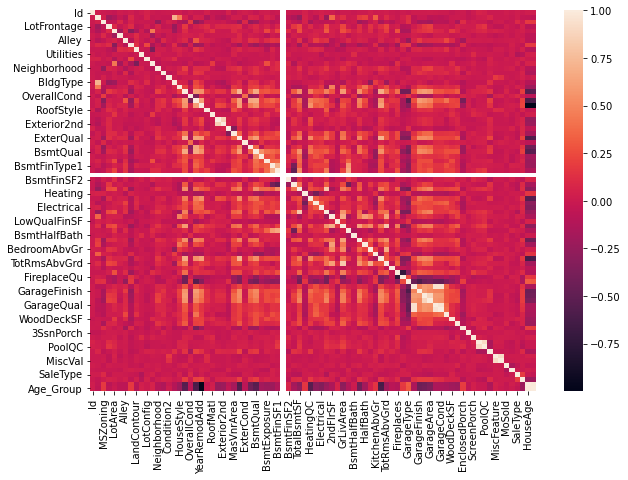

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(feature_scaled.corr())#, annot=True)
plt.show()

### Model Implementation

In [27]:
X = df_train.drop(['SalePrice'], axis=1) 
y = df_train['SalePrice']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Linear Regression

In [30]:
linear = LinearRegression()
linear.fit(X_train, y_train)

linear_predict = linear.predict(X_test)

linear_accuracy =  linear.score(X_test, y_test)

Decision Tree

In [31]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

dtree_predict = dtree.predict(X_test)

dtree_accuracy = dtree.score(X_test, y_test)

Random Forest

In [32]:
ran_fo = RandomForestRegressor()
ran_fo.fit(X_train, y_train)

ran_fo_predict = ran_fo.predict(X_test)

ran_fo_accuracy = ran_fo.score(X_test, y_test) 

XGB regressor

In [33]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_predict = xgb.predict(X_test)

xgb_accuracy = xgb.score(X_test, y_test)

In [34]:
mc = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGB Regressor'], 'Score': [linear_accuracy, dtree_accuracy, ran_fo_accuracy, xgb_accuracy]})
mc_s = mc.sort_values(by = 'Score', ascending = False)
mc_s = mc_s.set_index('Score')
mc_s

,Model
Score,
0.896039,Random Forest
0.891522,XGB Regressor
0.849412,Linear Regression
0.779111,Decision Tree


In [35]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgb, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 17688.613 (1884.320)


In [36]:
pred = xgb.predict(X_test)

###  House Price Prediction Using Ridge & Lasso.

Ridge regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [38]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

print(model.alpha_)

Mean MAE: 21000.402 (2100.382)
10.0


In [39]:
pred1 = model.predict(X_test)

Lasso regression

In [40]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0)
las.fit(X_train,y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(las, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.863e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Mean MAE: 21425.436 (2105.593)


In [41]:
pred2 = las.predict(X_test)